# Data preparation

In [ ]:
import os
import sys
import pandas as pd

pd.set_option("display.notebook_repr_html", False)
currentdir = os.getcwd()
parentdir = os.path.dirname(currentdir)
sys.path.append(parentdir)

from techminer import *

directory = "/workspaces/techminer-api/tests/data/"
file_name = directory + "scopus.csv"


# import_scopus_file(file_name, directory)
# -----------------------------------------------
# coverage(directory)
# summary(directory)
# -----------------------------------------------
# clean_institutions(directory)
# clean_keywords(directory)
# apply_thesaurus(directory, thesaurus_file="keywords.txt", input_column="author_keywords", output_column="author_keywords_thesaurus", strict=False)
# create_thesaurus(directory, column="keywords", thesaurus_file="test_thesaurus.txt", sep="; ")

# !cat ../data/processed/debug/filter.yaml

# Analysis

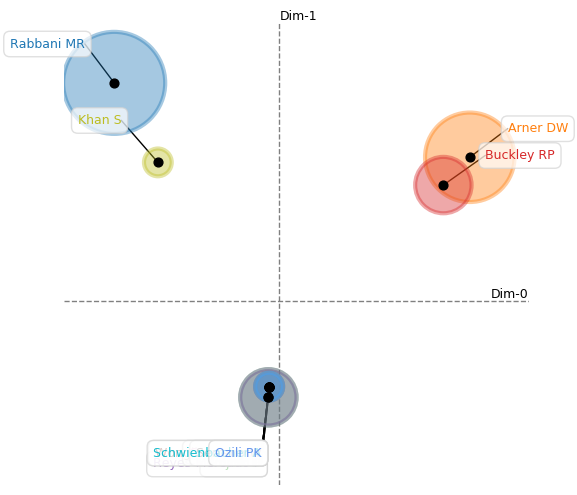

In [1]:
import os
import sys

currentdir = os.getcwd()
parentdir = os.path.dirname(currentdir)
sys.path.append(parentdir)

import pandas as pd

pd.set_option("display.notebook_repr_html", False)

from techminer import *

directory = "/workspaces/techminer-api/tests/data/"


# auto_corr_map(auto_corr_matrix(directory, column='authors', min_occ=4), num_terms=10)
# auto_corr_heat_map(auto_corr_matrix(directory, column='authors', min_occ=4), cmap='Reds').savefig("/workspaces/techminer-api/sphinx/images/auto_corr_heat_map.png")
# auto_corr_matrix(directory, column='authors', min_occ=6)
# co_occurrence_matrix(directory, column='authors', min_occ=5)
# co_occurrence_heat_map(co_occurrence_matrix(directory, column='authors', min_occ=5), cmap='Reds').savefig("/workspaces/techminer-api/sphinx/images/co_occurrence_heat_map.png")
# factor_matrix(co_occurrence_matrix(directory, column='authors', min_occ=6))
# factor_heat_map(factor_matrix(co_occurrence_matrix(directory, column='authors', min_occ=6))).savefig("/workspaces/techminer-api/sphinx/images/factor_heat_map.png")
members, centers = factor_clusters(factor_matrix(co_occurrence_matrix(directory, column='authors', min_occ=6)))
# factor_cluster_map(centers, members)
factor_members_map(factor_matrix(co_occurrence_matrix(directory, column='authors', min_occ=6)), members)
# ----



# bradford_plot(directory)
# lotka_plot(directory)
# worldmap(directory, metric="num_documents")
# core_authors(directory)
# core_sources(directory)
# count_documents_by_term(directory, column='authors', min_occ=6)
# impact_analysis(directory, column="authors")
# terms_analysis(directory, column='authors', min_occ=5)
# terms_per_year_analysis(directory, column='authors', metric='num_documents', min_occ=5)
# time_analysis(directory)
# top_documents(directory)
# co_occurrence_network_clusters(co_occurrence_matrix(directory, column='authors', min_occ=5))
# coc_matrix = co_occurrence_matrix(directory, column='authors', min_occ=5, association='jaccard')
# clusters = similarity_matrix_clustering(coc_matrix)
# similarity_matrix_bubble_map(coc_matrix, clusters)

# build_similarity_matrix_from_clusters(coc_matrix, clusters)

# Charts

In [ ]:
import os
import sys

currentdir = os.getcwd()
parentdir = os.path.dirname(currentdir)
sys.path.append(parentdir)

from techminer import *

directory = "../data/processed/debug"

# bar_chart(series=time_analysis(directory)['num_documents'], darkness=time_analysis(directory)['global_citations'])
# pie_chart(series=time_analysis(directory)['num_documents'], darkness=time_analysis(directory)['global_citations'])
# column_chart(series=time_analysis(directory)['num_documents'], darkness=time_analysis(directory)['global_citations'])
# word_cloud(terms_analysis(directory, column='authors')['num_documents'].head(50), cmap='Reds')
# tree_map(terms_analysis(directory, column='authors')['num_documents'].head(50), cmap='Reds')
# heat_map(terms_per_year_analysis(directory, column='authors', metric='num_documents', min_occ=5), cmap='Reds')
# cross_corr_matrix(directory, column='authors', by='author_keywords', min_occ=5)
# bubble_chart(co_occurrence_matrix(directory, column='authors', min_occ=5))
# slope_chart(co_occurrence_matrix(directory, column='authors', min_occ=5))

In [ ]:
import pandas as pd

pd.read_csv("../data/processed/debug/documents.csv").iso_source_name.value_counts()

In [ ]:
pd.read_csv("../data/processed/debug/documents.csv").columns